# Entendendo o GeoPandas

In [148]:
%matplotlib inline
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon, Point, LineString, MultiPolygon
import os
import zipfile
import folium
import shutil

## Fonte de Dados

http://spatialreference.org/

https://www.lapig.iesa.ufg.br/lapig/cursos_online/gvsig/a_projeo_utm_no_brasil.html

http://www.data.rio/

https://cursos.alura.com.br/course/geopandas-dados-geoespaciais/

In [149]:
rj = gpd.read_file('./dataset/Mapas/RJ/33MUE250GC_SIR.shp')

In [150]:
type(rj)

geopandas.geodataframe.GeoDataFrame

In [151]:
rj.head()

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,(POLYGON ((-44.33207951767609 -23.023835479182...
1,1469,3300159,APERIBÉ,POLYGON ((-42.08950238077959 -21.6289329293311...
2,1470,3300209,ARARUAMA,POLYGON ((-42.22525542277279 -22.5925335128971...
3,1471,3300225,AREAL,POLYGON ((-43.16007457995859 -22.2000478703121...
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,(POLYGON ((-41.9842653529651 -22.7445758290788...


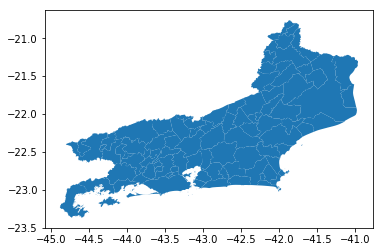

In [152]:
rj.plot()

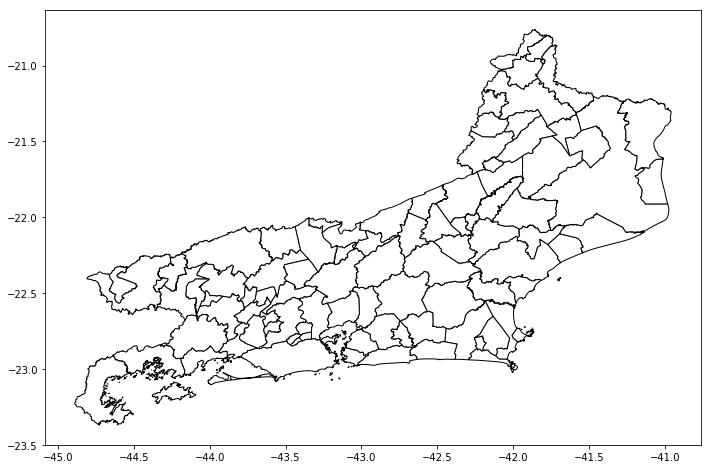

In [153]:
rj.plot(color='white', edgecolor='black', figsize=(15,8))

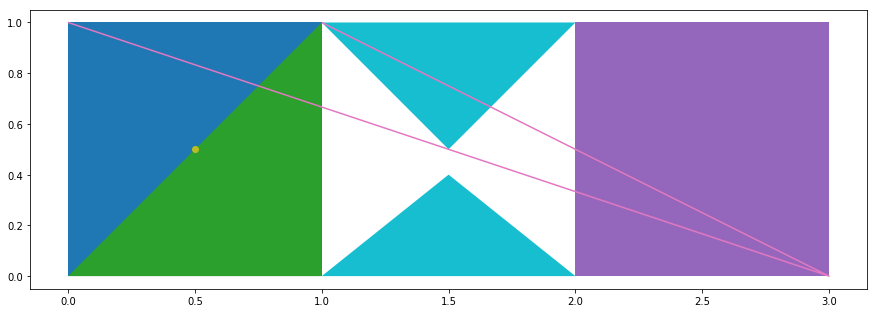

In [154]:
p1 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1)])

p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])

p4 = LineString([(0, 1), (3, 0), (1, 1)])
p5 = Point(0.5, 0.5)

p6 = Polygon([(1, 0), (1.5, 0.4), (2, 0)])
p7 = Polygon([(1, 1), (1.5, 0.5), (2, 1)])

p8 = MultiPolygon([p6, p7])

g = gpd.GeoSeries([p1, p2, p3, p4, p5, p8])
g.plot(cmap='tab10', figsize=(15,8))

## Modificando GeoDataframe

In [155]:
rj_mu = rj[rj['NM_MUNICIP'] == 'RIO DE JANEIRO']
rj_mu

,ID,CD_GEOCODM,NM_MUNICIP,geometry
67,1535,3304557,RIO DE JANEIRO,(POLYGON ((-43.1237647832704 -22.8071200194477...


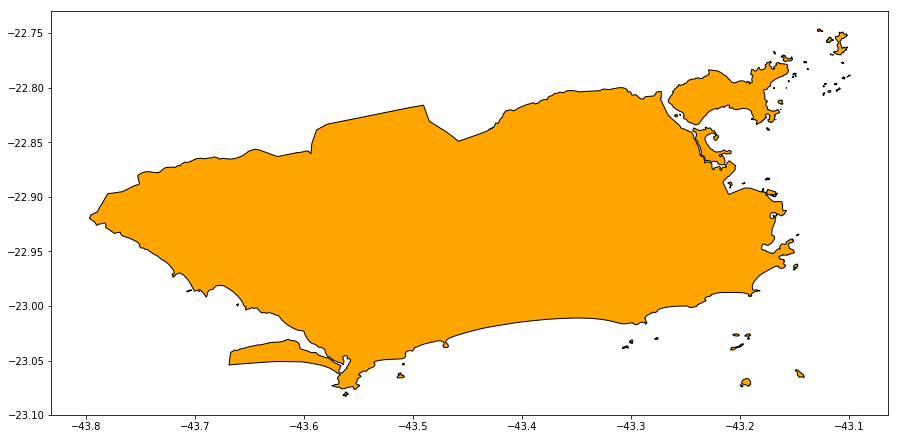

In [156]:
rj_mu.plot(color='orange', edgecolor='black', figsize=(15,8))

In [157]:
dir = './dataset/integracao'
if not os.path.exists(dir):
    os.makedirs(dir)

In [158]:
rj_mu.to_file(dir + '/rj.shp')

## Transformando DataFrame em GeoDataFrame

In [159]:
dados = pd.read_table('./dataset/dados.txt')

In [160]:
dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000


In [161]:
geometry = [Point(x) for x in zip(dados.Longitude, dados.Latitude)]

In [162]:
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datun': 'WGS84', 'no_defs': True}
geo_dados = gpd.GeoDataFrame(dados, crs=crs, geometry=geometry)

In [163]:
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (-43.4629464 -23.0164552)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (-43.3369111 -22.9431995)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (-43.300517 -22.873849)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (-43.4127033 -22.9847874)
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000,POINT (-51.92528 -14.235004)


In [164]:
geo_dados.to_file(dir + '/dados.shp')

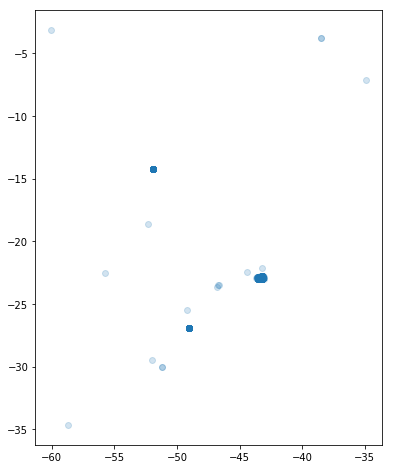

In [165]:
geo_dados.plot(figsize=(15, 8), alpha=0.2)

## Modificando o CRS dos Arquivos do Projeto

CRS: 
- '+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

In [166]:
rj_mu.crs

{'ellps': 'GRS80', 'no_defs': True, 'proj': 'longlat', 'wktext': True}

In [167]:
geo_dados.crs

{'datun': 'WGS84',
 'ellps': 'WGS84',
 'no_defs': True,
 'proj': 'latlong',
 'wktext': True}

In [168]:
rj_mu = rj_mu.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [169]:
geo_dados = geo_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [170]:
rj_mu.crs

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

In [171]:
geo_dados.crs

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

In [172]:
rj_mu.to_file(dir + '/rj.shp')
geo_dados.to_file(dir + '/dados.shp')

## Tratamento de Dados

### Selecionando Pontos dentro de uma Região

In [173]:
selecao = geo_dados['geometry'].within(rj_mu.iloc[0].geometry)

In [174]:
antes = geo_dados.shape[0]
antes

5000

In [175]:
geo_dados = geo_dados[selecao]
depois = geo_dados.shape[0]

In [176]:
depois - antes

-487

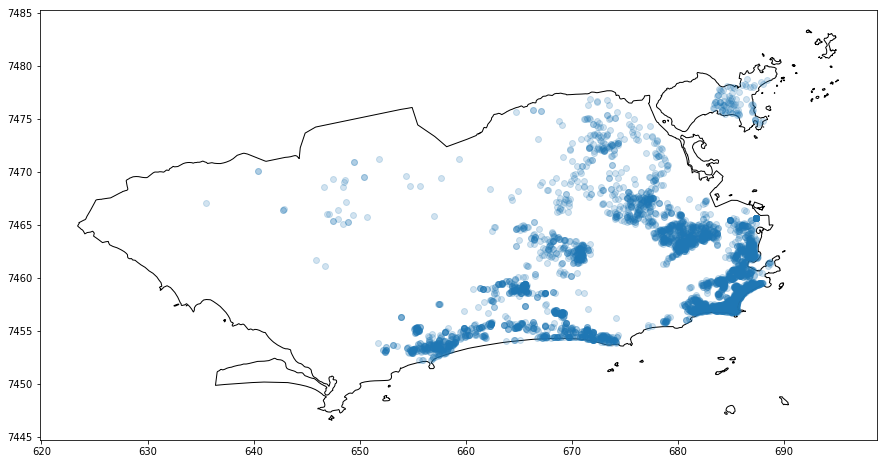

In [177]:
base = rj_mu.plot(color='white', edgecolor='black', figsize=(15, 8))
geo_dados.plot(ax=base, alpha=0.2)

In [178]:
geo_dados.to_file(dir + '/dados.shp')

### Distância até a Estação de Metrô mais Próxima

In [179]:
metro = gpd.read_file('./dataset/Transporte/Metrô/Estações_Metrô.geojson')

In [180]:
metro.head()

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,...,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,...,1,0,0,None,0,None,0,None,1998,POINT (-43.36484818699684 -22.80661994460496)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.35845219284542 -22.81626620939826)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.34964247534861 -22.82451848014957)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.34325654364894 -22.83147525097912)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.33386102638136 -22.84268515051918)


In [181]:
metro.crs

{'init': 'epsg:4326'}

In [182]:
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

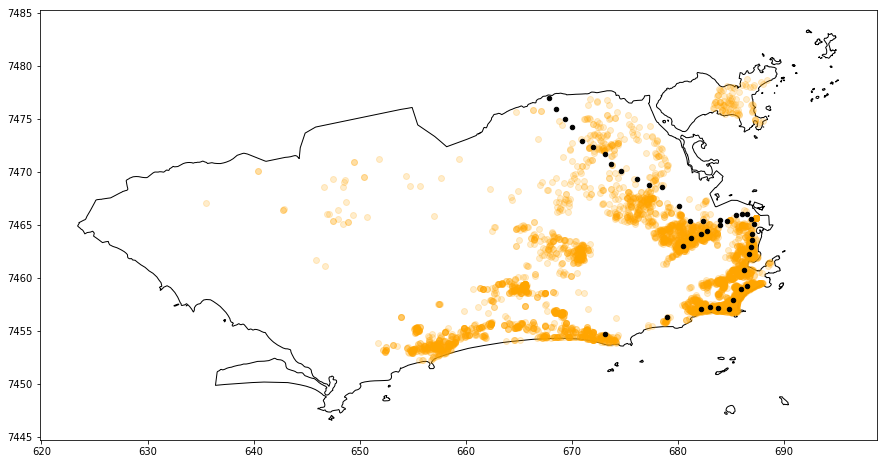

In [183]:
base = rj_mu.plot(color='white', edgecolor='black', figsize=(15, 8))
geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize=20)

In [184]:
geo_dados['Dist_Metro'] = geo_dados['geometry'].apply(lambda x: metro.distance(x).min())

In [185]:
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,Dist_Metro
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.5137068690914 7453.832425203203),15.622939
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.523902932077 7461.803087641334),7.530741
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.3450038415632 7469.439743130426),0.736973
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.7013782087528 7457.284070512802),10.718039
5,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.018714639558 7453.574299351505),17.131159


In [186]:
geo_dados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,Dist_Metro
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641
Dist_Metro,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000


In [187]:
coef = geo_dados['Valor'].corr(geo_dados['Dist_Metro'])
coef

-0.19564083161688842

In [188]:
geo_dados.to_file(dir + '/dados.shp')

#### Exercício

In [189]:
ex1 = pd.DataFrame([(-22.9531,-43.1884),(-23.0278,-43.4665),(-22.8463, -43.3007),(-22.8969,-43.3165)])
ex1.columns= ['Latitude', 'Longitude']
ex1

,Latitude,Longitude
0,-22.9531,-43.1884
1,-23.0278,-43.4665
2,-22.8463,-43.3007
3,-22.8969,-43.3165


In [190]:
geometry_ex = [Point(x) for x in zip(ex1.Longitude, ex1.Latitude)]

In [191]:
crs = {'init': 'epsg:4326'}
geo_ex = gpd.GeoDataFrame(ex1, crs=crs, geometry=geometry_ex)

In [192]:
geo_ex = geo_ex.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [193]:
geo_ex['Dist_Min'] = geo_ex['geometry'].apply(lambda x: metro.distance(x).min())
geo_ex['Metro_Perto'] = geo_ex['geometry'].apply(lambda x: metro.iloc[metro.distance(x).idxmin()]['Nome'])
geo_ex['Dist_Max'] = geo_ex['geometry'].apply(lambda x: metro.distance(x).max())
geo_ex['Metro_Longe'] = geo_ex['geometry'].apply(lambda x: metro.iloc[metro.distance(x).idxmax()]['Nome'])

In [194]:
geo_ex[['Metro_Perto', 'Dist_Min', 'Metro_Longe', 'Dist_Max']]

,Metro_Perto,Dist_Min,Metro_Longe,Dist_Max
0,Botafogo,0.513153,Pavuna,24.309365
1,Jardim Oceânico,16.118584,Cinelândia,32.510425
2,Vicente de Carvalho,1.532388,Ipanema / General Osório,18.653995
3,Engenho da Rainha,3.766528,Cardeal Arcoverde,15.795919


### Agregando Outros Tipos de Transporte

#### Estações de Trem

In [195]:
trem = gpd.read_file('./dataset/Transporte/Trem/Estações_Trem.geojson')

In [196]:
trem.head()

,OBJECTID,Cod,Nome,Flg_IntegraOnibus,Flg_IntegraMetro,Flg_Terminal,Flg_TransfRamal,Flg_TransfCentral,Flg_IntegraTele,Flg_Mun,...,Flg_Deodoro,Flg_SantaCruz,Flg_Japeri,Flg_Paracambi,Flg_VilaInhomirim,Flg_Guapimirim,Data_Inc,Integra_BRT,Corredor_BRT,geometry
0,1,60,Nova Iguaçu,NaN,NaN,1.0,NaN,NaN,NaN,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (-43.4493938990435 -22.76073059186585)
1,2,20,Comendador Soares,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (-43.48894951116015 -22.74414751357548)
2,3,4,Austin,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (-43.5227142869476 -22.72030904546734)
3,4,81,Queimados,NaN,NaN,1.0,NaN,NaN,NaN,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (-43.55610448989354 -22.71624490734336)
4,5,29,Engenheiro Pedreira,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,None,NaN,None,POINT (-43.60605978236732 -22.67874606622799)


In [197]:
trem.crs

{'init': 'epsg:4326'}

In [198]:
trem = trem.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
trem.crs

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

In [199]:
trem = trem[trem.within(rj_mu.iloc[0].geometry)]

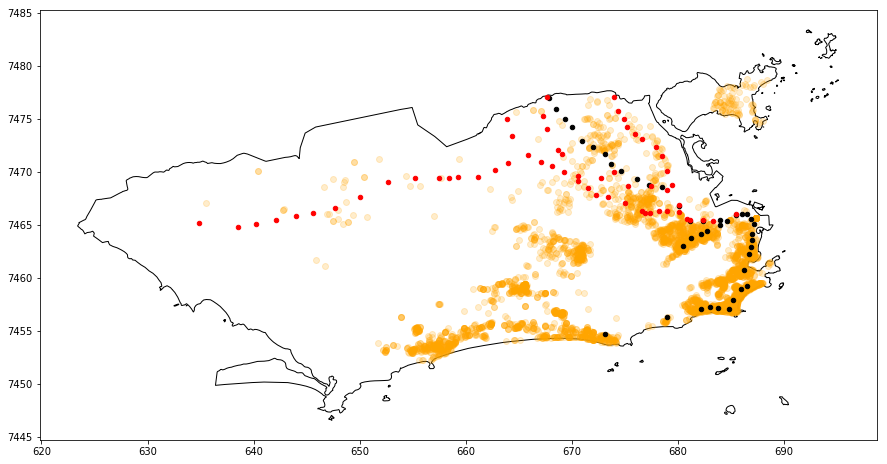

In [200]:
base = rj_mu.plot(color='white', edgecolor='black', figsize=(15, 8))
geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize=20)
trem.plot(ax=base, color='red', markersize=20)

#### Estações BRT

In [201]:
brt = gpd.read_file('./dataset/Transporte/BRT/Estações_BRT.geojson')

In [202]:
brt.head()

,OBJECTID,Nome,Flg_Ativo,Status,X,Y,Flg_TransCarioca,Flg_TransBrasil,Flg_TransOeste,Flg_TransOlimpica,ChaveGeo,Data_Inc,Integra_Trem,Integra_Metro,Integra_Aeroporto,geometry
0,1,Santa Luzia,1,1,679342.4694,7.471500e+06,1,0,0,0,None,None,0.0,0.0,0.0,POINT (-43.25243863414162 -22.85512892524178)
1,2,Maré,1,1,680236.1565,7.472380e+06,1,0,0,0,None,None,0.0,0.0,0.0,POINT (-43.2438336143177 -22.84708698850826)
2,3,Cardoso de Moraes - Viúva Garcia,1,1,678744.0560,7.471252e+06,1,0,0,0,None,None,0.0,0.0,0.0,POINT (-43.25824046741926 -22.85742717311524)
3,4,Penha I,1,1,676833.5642,7.473029e+06,1,0,0,0,None,None,0.0,0.0,0.0,POINT (-43.2770569813563 -22.84158249943004)
4,5,Penha II,1,1,676873.5062,7.472977e+06,1,0,0,0,None,None,0.0,0.0,0.0,POINT (-43.27666185663485 -22.84205493624626)


In [203]:
brt.crs

{'init': 'epsg:4326'}

In [204]:
brt = brt.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
brt.crs

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

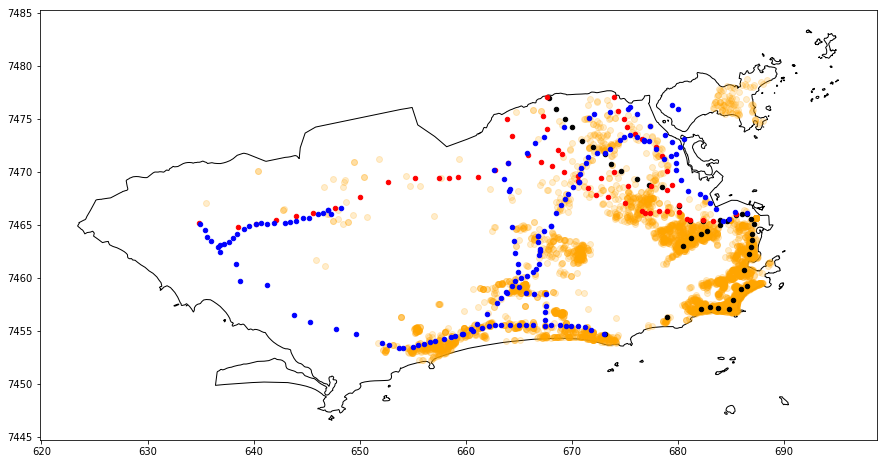

In [205]:
base = rj_mu.plot(color='white', edgecolor='black', figsize=(15, 8))
geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize=20)
trem.plot(ax=base, color='red', markersize=20)
brt.plot(ax=base, color='blue', markersize=20)

In [206]:
transporte = pd.concat([trem.geometry, metro.geometry, brt.geometry], ignore_index=True)

In [207]:
transporte.head()

0    POINT (676.8659975527119 7466.079220529946)
1    POINT (663.9636891896419 7470.815164527775)
2    POINT (662.7917656555114 7470.217932679037)
3     POINT (661.118716778229 7469.485407958118)
4    POINT (659.2743330831419 7469.468711550076)
dtype: object

In [208]:
geo_dados['Dist_Transporte'] = geo_dados['geometry'].apply(lambda x: transporte.distance(x).min())

In [209]:
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,Dist_Metro,Dist_Transporte
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.5137068690914 7453.832425203203),15.622939,0.443193
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.523902932077 7461.803087641334),7.530741,3.642787
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.3450038415632 7469.439743130426),0.736973,0.641470
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.7013782087528 7457.284070512802),10.718039,0.422370
5,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.018714639558 7453.574299351505),17.131159,0.214605


In [210]:
geo_dados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,Dist_Metro,Dist_Transporte
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671,-0.042684
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864,0.358735
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788,-0.031812
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794,-0.014628
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521,0.006363
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787,0.070240
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641,-0.103653
Dist_Metro,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000,0.261040
Dist_Transporte,-0.042684,0.358735,-0.031812,-0.014628,0.006363,0.070240,-0.103653,0.261040,1.000000


In [211]:
geo_dados.to_file(dir + '/dados.shp')

## Distância Até a Praia

In [212]:
praias = gpd.read_file('./dataset/Vegetação e Uso do Solo/Cobertura_Vegetal_e_Uso_da_Terra_2016.geojson')

In [213]:
praias.crs

{'init': 'epsg:4326'}

In [214]:
praias.head()

,Sigla,ANO,legenda,ShapeSTArea,ShapeSTLength,OBJECTID,GRUPO,CLASSE,FORMACOES,ESTAGIO_SUCESSIONAL,"SMAC""RIO\02497196""Mapeamento_CoberturaArea",geometry
0,Con,2016-01-01T00:00:00,Corpos d’água continentais,8684.890625,441.128326,19870,Outros,Corpos d’água continentais,,,8684.889153,POLYGON ((-43.5660117467795 -23.06277077706398...
1,Con,2016-01-01T00:00:00,Corpos d’água continentais,2209.344727,241.436403,19871,Outros,Corpos d’água continentais,,,2209.343321,POLYGON ((-43.59624661698768 -23.0479558726934...
2,Con,2016-01-01T00:00:00,Corpos d’água continentais,17015.344727,468.728882,19872,Outros,Corpos d’água continentais,,,17015.344086,POLYGON ((-43.5973725176727 -23.04844617247899...
3,Con,2016-01-01T00:00:00,Corpos d’água continentais,17597.541016,916.463204,19873,Outros,Corpos d’água continentais,,,17597.540796,POLYGON ((-43.60807660659002 -23.0433583534712...
4,Vg,2016-01-01T00:00:00,Vegetação gramíneo-lenhosa,11834.875977,605.329142,19874,Antropismo,Vegetação gramíneo-lenhosa,,,11834.876012,POLYGON ((-43.56995180575708 -23.0585834664359...


In [215]:
praias = praias.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
praias.crs

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

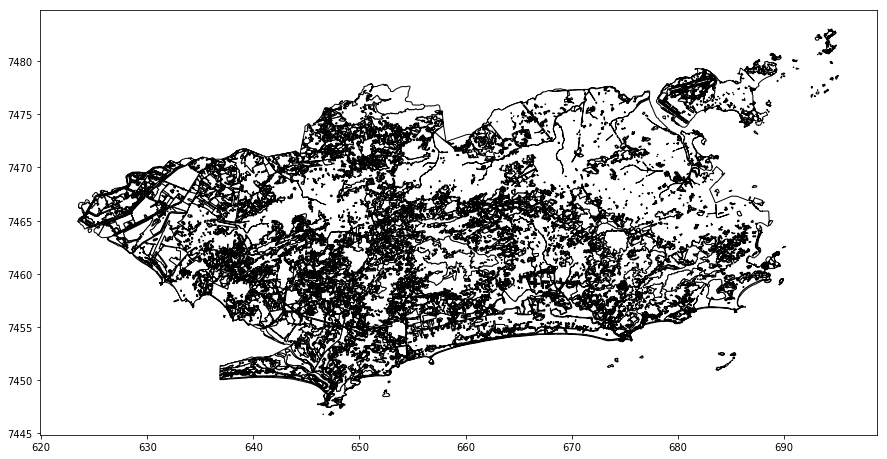

In [216]:
praias.plot(color='white', edgecolor='black', figsize=(15, 8))

In [217]:
praias['legenda'].value_counts()

Vegetação arbórea não florestal                                     3495
Vegetação gramíneo-lenhosa                                          2022
Floresta Ombrófila Densa, Estágio Inicial                            643
Áreas Urbanas                                                        639
Afloramento Rochoso                                                  474
Uso agrícola, Lavoura Permanente                                     445
Floresta Ombrófila Densa, Estágio Médio                              414
Corpos d’água continentais                                           388
Reflorestamento                                                      252
Formação Pioneira com influência flúvio-lacustre, Brejo herbáceo     210
Uso agrícola, Lavoura Temporária                                     164
Formação Pioneira com influência flúvio-marinha, Manguezal           161
Solo exposto                                                         152
Formação Pioneira com influência flúvio-marinha, Ca

In [218]:
praias = praias[praias['legenda'] == 'Praia']

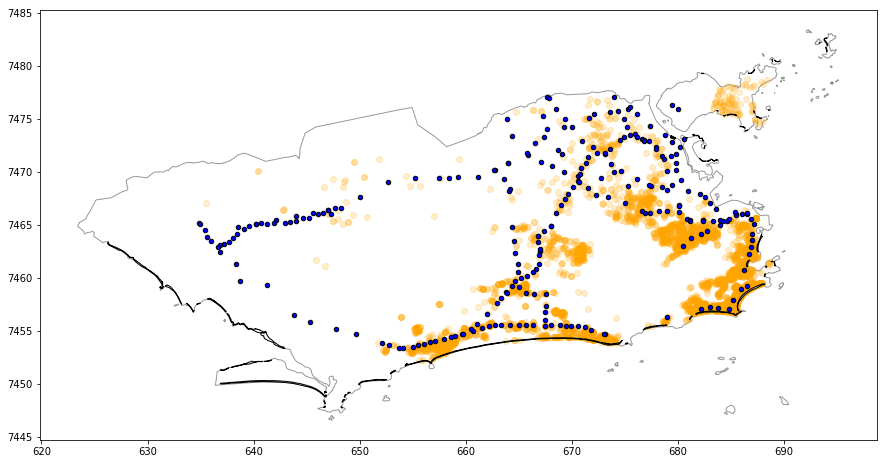

In [219]:
base = rj_mu.plot(color='white', edgecolor='black', alpha=0.4, figsize=(15, 8))
geo_dados.plot(ax=base, color='orange', alpha=0.2)
transporte.plot(ax=base, color='blue', edgecolor='black', markersize=20)
praias.plot(ax=base, color='white', edgecolor='black')

In [220]:
geo_dados['Dist_Praia'] = geo_dados['geometry'].apply(lambda x: praias.distance(x).min())

In [221]:
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,Dist_Metro,Dist_Transporte,Dist_Praia
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.5137068690914 7453.832425203203),15.622939,0.443193,1.143453
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.523902932077 7461.803087641334),7.530741,3.642787,7.478698
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.3450038415632 7469.439743130426),0.736973,0.641470,6.240694
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.7013782087528 7457.284070512802),10.718039,0.422370,3.404589
5,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.018714639558 7453.574299351505),17.131159,0.214605,1.369015


In [222]:
geo_dados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,Dist_Metro,Dist_Transporte,Dist_Praia
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671,-0.042684,-0.290745
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864,0.358735,0.560701
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788,-0.031812,-0.317743
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794,-0.014628,-0.185829
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521,0.006363,-0.196554
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787,0.070240,-0.104570
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641,-0.103653,-0.361519
Dist_Metro,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000,0.261040,0.187805
Dist_Transporte,-0.042684,0.358735,-0.031812,-0.014628,0.006363,0.070240,-0.103653,0.261040,1.000000,0.230641
Dist_Praia,-0.290745,0.560701,-0.317743,-0.185829,-0.196554,-0.104570,-0.361519,0.187805,0.230641,1.000000


In [223]:
geo_dados.to_file(dir + '/dados.shp')

### Exercício

In [224]:
rj = rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
rj.crs

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

In [225]:
rj['Dist_RJ'] = rj['geometry'].distance(rj_mu.iloc[0].geometry)

In [226]:
rj.sort_values(by='Dist_RJ', ascending=False)[['NM_MUNICIP', 'Dist_RJ']].iloc[0]

NM_MUNICIP    VARRE-SAI
Dist_RJ         233.225
Name: 89, dtype: object

# Setores Censitários

## Fontes de Dados

ftp://geoftp.ibge.gov.br/recortes_para_fins_estatisticos/malha_de_setores_censitarios/censo_2010/base_de_faces_de_logradouros/RJ/

In [227]:
temp_dir = 'TEMP'
if not os.path.exists(temp_dir):
    os.makedirs(temp_dir)

In [228]:
rj_setor_dir = './dataset/01.Dados/Mapas/RJ-SETOR/DADOS'
filenames = []
for root, dirs, files in os.walk(rj_setor_dir):
    filenames = files

In [229]:
for item in filenames:
    zip_ref = zipfile.ZipFile('%s/%s' %(rj_setor_dir, item), 'r')
    zip_ref.extractall(temp_dir)
    zip_ref.close()

In [230]:
setores = [gpd.read_file('%s/%s_setor.shp' % (temp_dir, item[:-4])) for item in filenames]

In [231]:
setor = pd.concat(setores, ignore_index=True)

In [232]:
setor.head()

,ID1,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODD,NM_DISTRIT,CD_GEOCODS,NM_SUBDIST,CD_GEOCODM,NM_MUNICIP,NM_MESO,NM_MICRO,geometry
0,409508,330455705280058,URBANO,330455705128,Santa Teresa,330455705,RIO DE JANEIRO,330455705,SANTA TERESA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.1847805960318 -22.9208889438535,..."
1,409509,330455705280059,URBANO,330455705128,Santa Teresa,330455705,RIO DE JANEIRO,330455705,SANTA TERESA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.1847654771419 -22.9199396139177,..."
2,409510,330455705280060,URBANO,330455705128,Santa Teresa,330455705,RIO DE JANEIRO,330455705,SANTA TERESA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.1840483864964 -22.9194207025679,..."
3,409511,330455705280061,URBANO,330455705128,Santa Teresa,330455705,RIO DE JANEIRO,330455705,SANTA TERESA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,POLYGON ((-43.18483015701801 -22.9211279722146...
4,409512,330455705280062,URBANO,330455705128,Santa Teresa,330455705,RIO DE JANEIRO,330455705,SANTA TERESA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.1860015135487 -22.9199447458274,..."


In [233]:
type(setor)

geopandas.geodataframe.GeoDataFrame

In [234]:
setor = setor.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
setor.crs

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

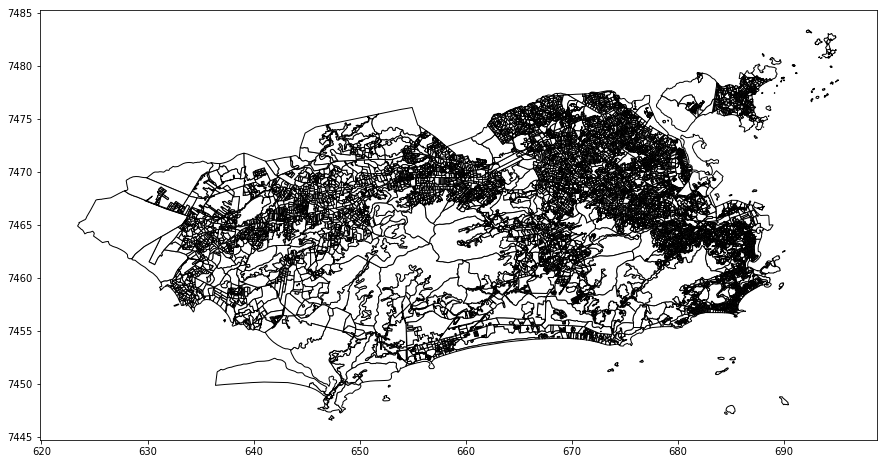

In [235]:
setor.plot(color='white', edgecolor='black', figsize=(15,8))

In [236]:
setor.to_file(dir + '/RJ-SETOR.shp')

In [237]:
botafogo = setor[setor['NM_BAIRRO'] == 'Botafogo']

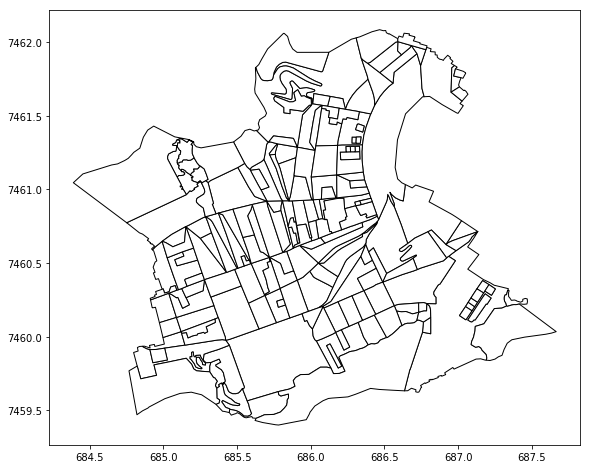

In [238]:
botafogo.plot(color='white', edgecolor='black', figsize=(15,8))

## Dados Censitários

In [239]:
censo = pd.read_excel('./dataset/01.Dados/Censo 2010/RJ/EXCEL/Basico_RJ.xls', encoding = 'utf-8')

In [240]:
censo.head()

,Cod_setor,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,330010005000001,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33013,Baía da Ilha Grande,0,...,2.62,1.94,2356.80,5716056.06,2571.06,5684616.94,1565.37,4344465.56,2192.65,4711305.89
1,330010005000002,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33013,Baía da Ilha Grande,0,...,2.51,1.50,2040.47,3020377.79,2236.67,2869054.77,1816.69,20052928.88,2375.67,24942113.99
2,330010005000003,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33013,Baía da Ilha Grande,0,...,3.08,2.19,2687.80,8362007.52,2836.66,8402987.99,1593.37,7250920.66,2294.84,8835722.10
3,330010005000004,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33013,Baía da Ilha Grande,0,...,3.04,3.25,3026.67,24807309.86,3352.62,26410753.99,1865.52,10994097.59,2574.41,13362652.63
4,330010005000005,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33013,Baía da Ilha Grande,0,...,3.34,1.94,1124.82,712447.24,1229.19,649944.69,689.40,583588.50,1028.21,521878.03


In [241]:
censo['Cod_setor'] = censo['Cod_setor'].astype(str)

In [242]:
setor.shape

(10504, 14)

In [243]:
setor = pd.merge(setor, censo, left_on='CD_GEOCODI', right_on='Cod_setor', how='left')

In [244]:
setor.shape

(10504, 47)

In [245]:
setor.columns

Index(['ID1', 'CD_GEOCODI', 'TIPO', 'CD_GEOCODB', 'NM_BAIRRO', 'CD_GEOCODD',
       'NM_DISTRIT', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODM', 'NM_MUNICIP',
       'NM_MESO', 'NM_MICRO', 'geometry', 'Cod_setor', 'Cod_Grandes Regiões',
       'Nome_Grande_Regiao', 'Cod_UF', 'Nome_da_UF ', 'Cod_meso',
       'Nome_da_meso', 'Cod_micro', 'Nome_da_micro', 'Cod_RM', 'Nome_da_RM',
       'Cod_municipio', 'Nome_do_municipio', 'Cod_distrito',
       'Nome_do_distrito', 'Cod_subdistrito', 'Nome_do_subdistrito',
       'Cod_bairro', 'Nome_do_bairro', 'Situacao_setor', 'Tipo_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012'],
      dtype='object')

In [246]:
setor.head()

,ID1,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODD,NM_DISTRIT,CD_GEOCODS,NM_SUBDIST,CD_GEOCODM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,409508,330455705280058,URBANO,330455705128,Santa Teresa,330455705,RIO DE JANEIRO,330455705,SANTA TERESA,3304557,...,3.15,2.82,4870.77,42518980.97,6550.34,46309610.59,2907.24,24511387.11,4959.41,31742322.04
1,409509,330455705280059,URBANO,330455705128,Santa Teresa,330455705,RIO DE JANEIRO,330455705,SANTA TERESA,3304557,...,2.12,1.57,3500.41,15858294.24,3584.75,15938299.17,2642.32,10950551.48,2983.26,11347074.65
2,409510,330455705280060,URBANO,330455705128,Santa Teresa,330455705,RIO DE JANEIRO,330455705,SANTA TERESA,3304557,...,3.07,2.92,1344.47,3564950.39,1502.65,3749389.90,800.31,1732853.79,1141.62,2084809.22
3,409511,330455705280061,URBANO,330455705128,Santa Teresa,330455705,RIO DE JANEIRO,330455705,SANTA TERESA,3304557,...,2.45,2.46,1699.71,5491429.22,1860.89,5714151.67,1256.03,3639489.35,1682.60,4160240.99
4,409512,330455705280062,URBANO,330455705128,Santa Teresa,330455705,RIO DE JANEIRO,330455705,SANTA TERESA,3304557,...,2.96,2.11,3082.50,16103900.93,3196.67,16344292.31,1948.54,17482734.66,2687.64,22209172.73


In [247]:
setor.to_file(dir + '/RJ-SETOR.shp')

## Juntando Dados Censitários ao Dataset

In [248]:
geo_dados.shape

(4513, 17)

In [249]:
geo_dados = gpd.sjoin(geo_dados, setor, how='left', op='within')

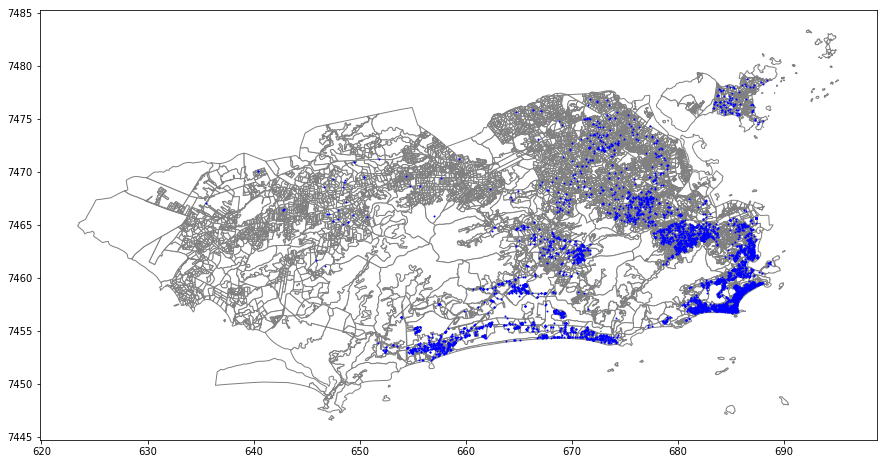

In [250]:
base = setor.plot(color='white', edgecolor='gray', figsize=(15,8))
geo_dados.plot(ax=base, color='blue', markersize=1)

In [251]:
geo_dados.shape

(4516, 64)

In [252]:
geo_dados = geo_dados[~geo_dados.index.duplicated(keep='first')]

In [253]:
geo_dados.shape

(4513, 64)

In [254]:
geo_dados.crs

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

In [255]:
geo_dados.to_file(dir + '/dados.shp')

## Agregando Regiões Geográficas

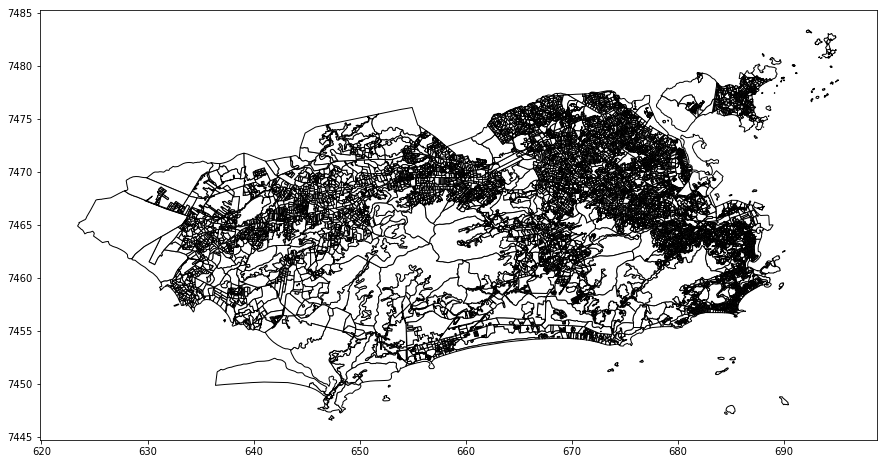

In [256]:
setor.plot(color='white', edgecolor='black', figsize=(15,8))

In [257]:
setor = gpd.read_file(dir + '/RJ-SETOR.shp')
setor.crs

{'ellps': 'GRS80',
 'no_defs': True,
 'proj': 'utm',
 'south': True,
 'units': 'km',
 'zone': 23}

In [258]:
setor = setor.to_crs({'init': 'epsg:4326'})
setor.crs

{'init': 'epsg:4326'}

In [259]:
bairro = setor[['NM_BAIRRO', 'geometry', 'V002']].dissolve(by='NM_BAIRRO', aggfunc='sum')

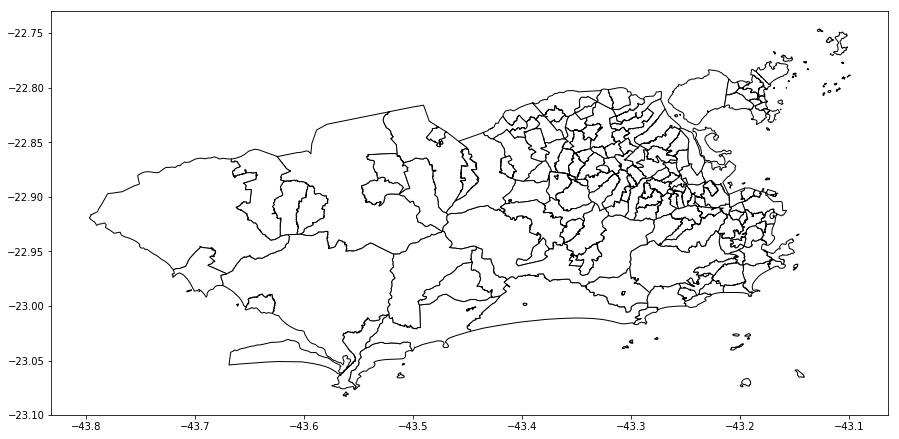

In [260]:
bairro.plot(color='white', edgecolor='black', figsize=(15,8))

In [261]:
bairro.head()

,geometry,V002
NM_BAIRRO,,
Abolição,"POLYGON ((-43.294894660711 -22.8891616814855, ...",11356.0
Acari,POLYGON ((-43.3388200954624 -22.82658497319727...,26967.0
Alto da Boa Vista,POLYGON ((-43.29377143584567 -22.9798581617442...,9189.0
Anchieta,POLYGON ((-43.38539774811345 -22.8268893315425...,55634.0
Andaraí,POLYGON ((-43.25435989348761 -22.9342165919610...,39325.0


In [262]:
bairro['V002'].sum()

6283486.0

In [263]:
bairro = bairro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [264]:
bairro.reset_index(inplace=True)

In [265]:
bairro.head()

,NM_BAIRRO,geometry,V002
0,Abolição,"POLYGON ((674.9022762714341 7467.737467256388,...",11356.0
1,Acari,"POLYGON ((670.4737581541464 7474.718121014254,...",26967.0
2,Alto da Boa Vista,"POLYGON ((674.9009368223093 7457.693019411093,...",9189.0
3,Anchieta,"POLYGON ((665.6925899602477 7474.737453569964,...",55634.0
4,Andaraí,"POLYGON ((679.0018532965294 7462.699607526377,...",39325.0


In [266]:
bairro.to_file(dir + '/RJ-BAIRRO.shp')

# Gerando Visualização dos Dados

In [267]:
rj = gpd.read_file('./dataset/integracao/rj.shp')
geo_dados = gpd.read_file('./dataset/integracao/dados.shp')
setor = gpd.read_file('./dataset/integracao/RJ-SETOR.shp')
bairro = gpd.read_file('./dataset/integracao/RJ-BAIRRO.shp')

In [268]:
crs = {'init':'epsg:4326'}

In [269]:
rj.head()

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1535,3304557,RIO DE JANEIRO,(POLYGON ((692.5758012880241 7476.609203982512...


In [270]:
rj.to_crs(crs, inplace=True)

In [271]:
x = rj.centroid.x.iloc[0]
y = rj.centroid.y.iloc[0]

In [272]:
base = folium.Map([y, x], zoom_start=11, tiles="OpenStreetMap")
geojson_rj = folium.GeoJson(rj)
geojson_rj.add_child(folium.Popup(rj.NM_MUNICIP.iloc[0]))
geojson_rj.add_to(base)
base

## Mapa com várias Camadas

In [273]:
bairro.to_crs(crs, inplace=True)

In [274]:
bairro.head()

,NM_BAIRRO,V002,geometry
0,Abolição,11356.0,POLYGON ((-43.29489466071051 -22.8891616814851...
1,Acari,26967.0,POLYGON ((-43.33882009546199 -22.8265849731969...
2,Alto da Boa Vista,9189.0,POLYGON ((-43.29377143584514 -22.9798581617438...
3,Anchieta,55634.0,POLYGON ((-43.38539774811311 -22.8268893315422...
4,Andaraí,39325.0,POLYGON ((-43.25435989348701 -22.9342165919605...


In [275]:
base = folium.Map([y, x], zoom_start=11, tiles="OpenStreetMap")

for i in range(len(bairro)):
    geo = folium.GeoJson(bairro[i:i+1], name=bairro['NM_BAIRRO'][i])
    label = '{} - {} habitantes'.format(bairro['NM_BAIRRO'][i], bairro['V002'][i])
    folium.Popup(label).add_to(geo)
    geo.add_to(base)
    
folium.LayerControl().add_to(base)

base.save('Bairros (RJ).html')

## Mapa com Marcadores 

In [276]:
base = folium.Map([y, x], zoom_start=11, tiles="OpenStreetMap")
base.choropleth(rj,
               name='Rio de Janeiro',
               line_color='Black',
               line_weight=3,
               fill_opacity=0)

amostra = geo_dados.sample(500)

for item in amostra.itertuples():
    base.add_child(folium.Marker(location=[item.Latitude, item.Longitude],
                                popup="<h4>" + str(item.Tipo) + "</h4> <h5>" + item.Bairro + "</h5> <p>R$ " + str(item.Valor) +  ",00</p>",
                                icon=folium.Icon(color='red', prefix='fa', icon='fas fa-home'))
                  )

folium.LayerControl().add_to(base)

base.save('Dataset Marcadores.html')

/home/orube/anaconda3/envs/FIONA/lib/python3.5/site-packages/folium/folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


## Mapa com Marcadores Clusterizados

In [277]:
from folium.plugins import MarkerCluster

In [278]:
base = folium.Map([y, x], zoom_start=11, tiles="OpenStreetMap")
base.choropleth(rj,
               name='Rio de Janeiro',
               line_color='Black',
               line_weight=3,
               fill_opacity=0)

cluster = MarkerCluster(name='Imóveis Anunciados')

for item in geo_dados.itertuples():
    cluster.add_child(folium.Marker(location=[item.Latitude, item.Longitude],
                                popup="<h4>" + str(item.Tipo) + "</h4> <h5>" + item.Bairro + "</h5> <p>R$ " + str(item.Valor) +  ",00</p>",
                                icon=folium.Icon(color='red', prefix='fa', icon='fas fa-home'))
                  )

base.add_child(cluster)

folium.LayerControl().add_to(base)

base.save('Dataset Marcadores Clusterizados.html')

/home/orube/anaconda3/envs/FIONA/lib/python3.5/site-packages/folium/folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


## Mapas de Calor

In [279]:
setor.to_crs(crs, inplace=True)

In [280]:
setor.fillna(0, inplace=True)

In [281]:
data = []
for i in range(len(setor)):
    data.append([setor['geometry'][i].centroid.y,
                setor['geometry'][i].centroid.x,
                setor['V002'][i] / setor['V002'].max()])

In [283]:
from folium.plugins import HeatMap

In [284]:
base = folium.Map([y, x], zoom_start=11, tiles="OpenStreetMap")

HeatMap(data, name="População").add_to(base)

folium.LayerControl().add_to(base)

base.save("HeatMap.html")

base